## Importing required libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [7]:
df=df.dropna(subset='rating')
df=df.dropna(subset='date_added')
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')

In [8]:
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')

**Size of data After Cleaning dataset**

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.shape

(7770, 12)

## Exploratory Data Analysis (EDA)

In [11]:
type_df=df['type'].value_counts()
type_df

,count
type,
Movie,5372
TV Show,2398


In [12]:
fig = px.pie(
      values=[type_df['Movie'], type_df['TV Show']],
      title='Distribution between Movie and TV Show',
      names=['Movie', 'TV Show'],
      hover_name=['Movie', 'TV Show'],
      opacity=.9,
      template='plotly_dark'
  )
fig.show()

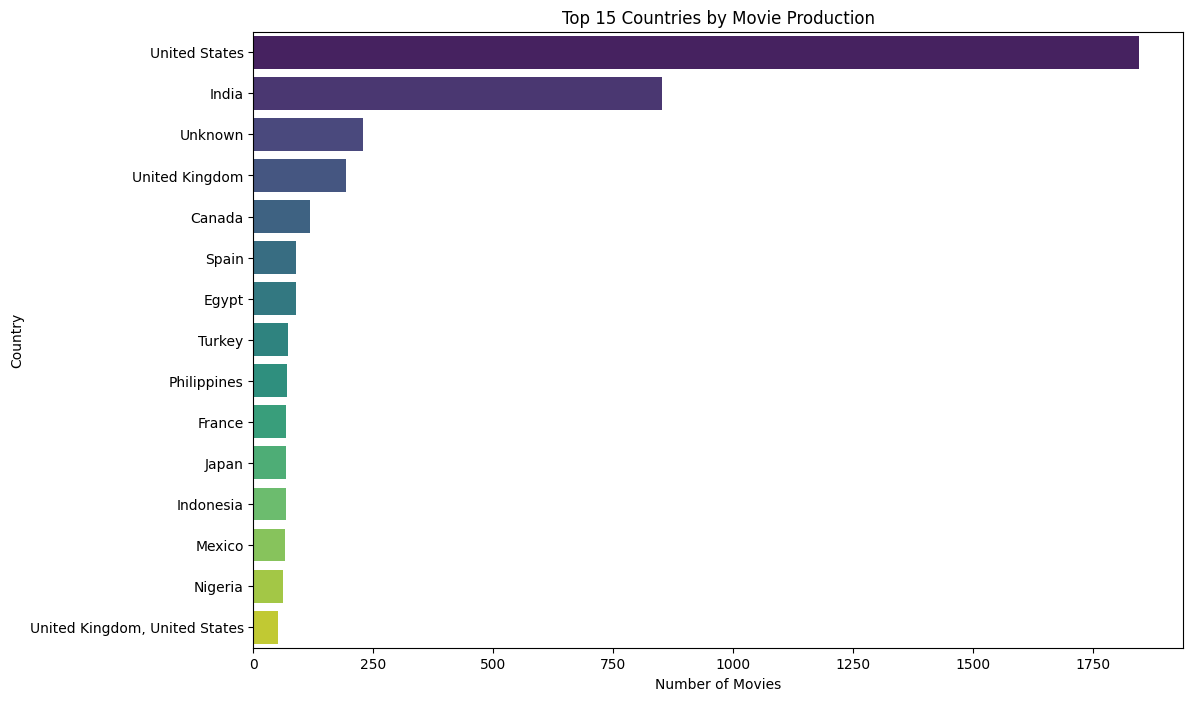

In [15]:
movies_df = df[df['type']=='Movie']
movies_count = movies_df.groupby('country')['type'].count().sort_values(ascending=False)[:15]

movies_df = movies_count.reset_index()
movies_df.columns = ['country', 'movie_count']

plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='movie_count', data=movies_df, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Countries by Movie Production')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

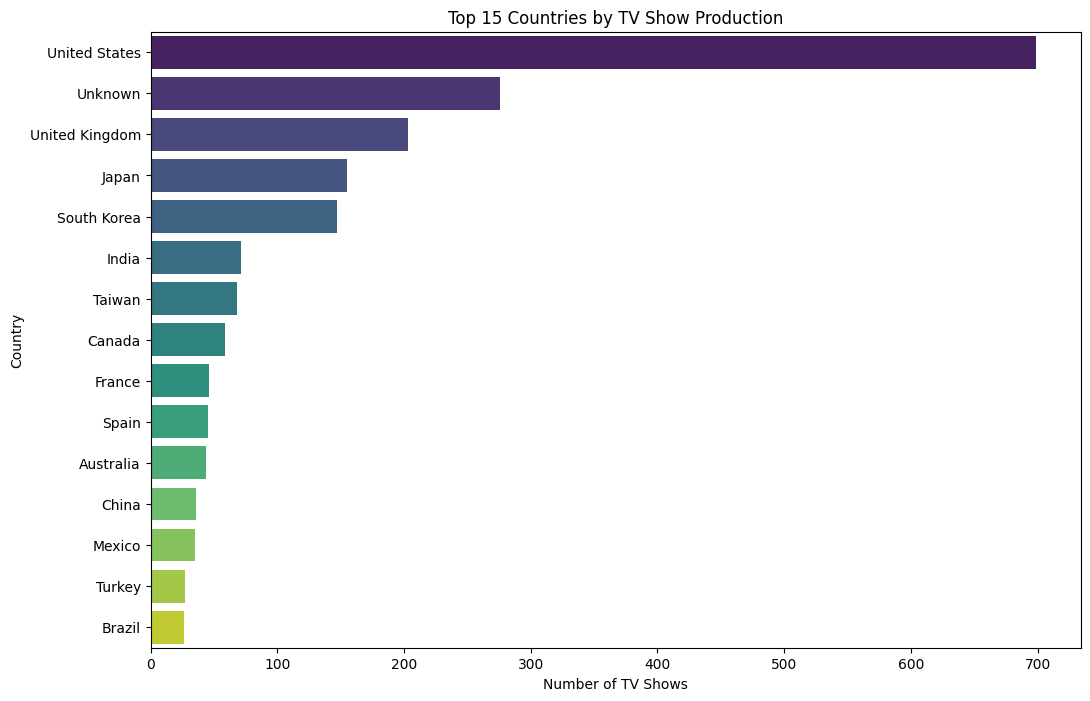

In [16]:
TV_Show_df = df[df['type']=='TV Show']
TV_Show_Count = TV_Show_df.groupby('country')['type'].count().sort_values(ascending=False)[:15]
TV_Show_df = TV_Show_Count.reset_index()
TV_Show_df.columns = ['country', 'count']
TV_Show_df
plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='count', data=TV_Show_df, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Countries by TV Show Production')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()

In [17]:
movies_df = df[df['type']=='Movie']
show_df = df[df['type']=='TV Show']
movies_df['duration_min']=movies_df['duration'].str.replace(' min', '').astype(int)
movies_df.drop(columns='duration', inplace=True)
show_df['Seasons'] = df['duration'].str.extract('(\d+)').astype(int)
show_df.drop(columns='duration', inplace=True)

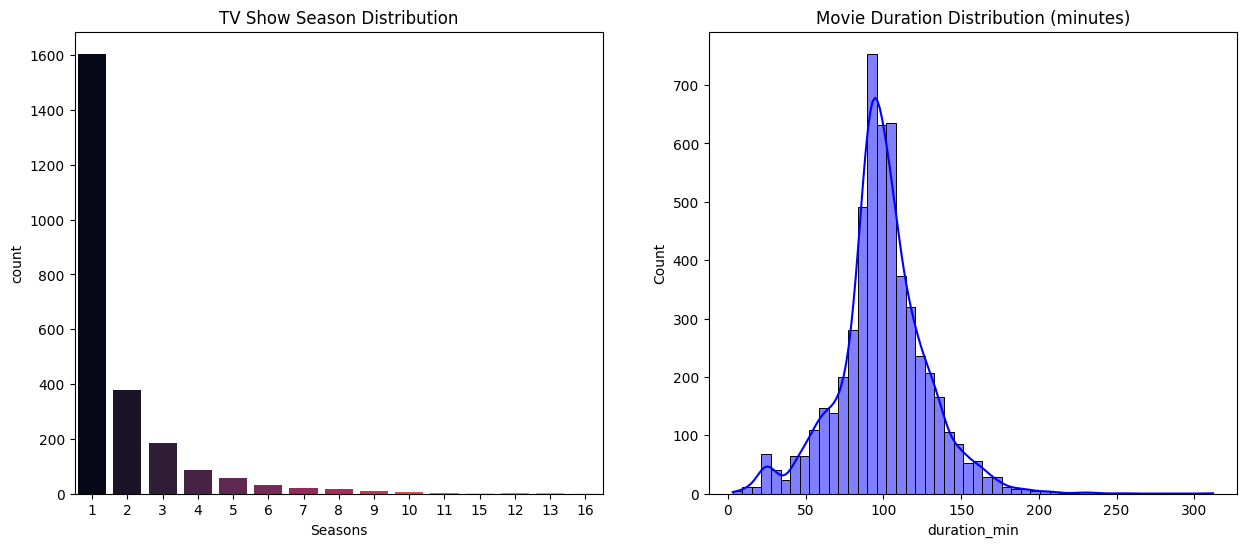

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(ax=axes[0], x='Seasons', data=show_df, palette='rocket', order=show_df['Seasons'].value_counts().index, hue='Seasons', legend=False).set_title('TV Show Season Distribution')
sns.histplot(ax=axes[1], data=movies_df, x='duration_min', bins=50, kde=True, color='blue').set_title('Movie Duration Distribution (minutes)')
plt.show()

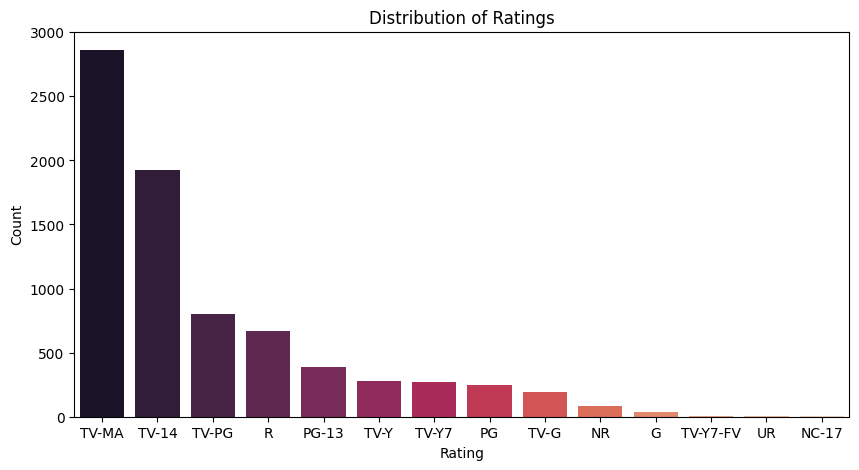

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<Figure size 1400x700 with 0 Axes>

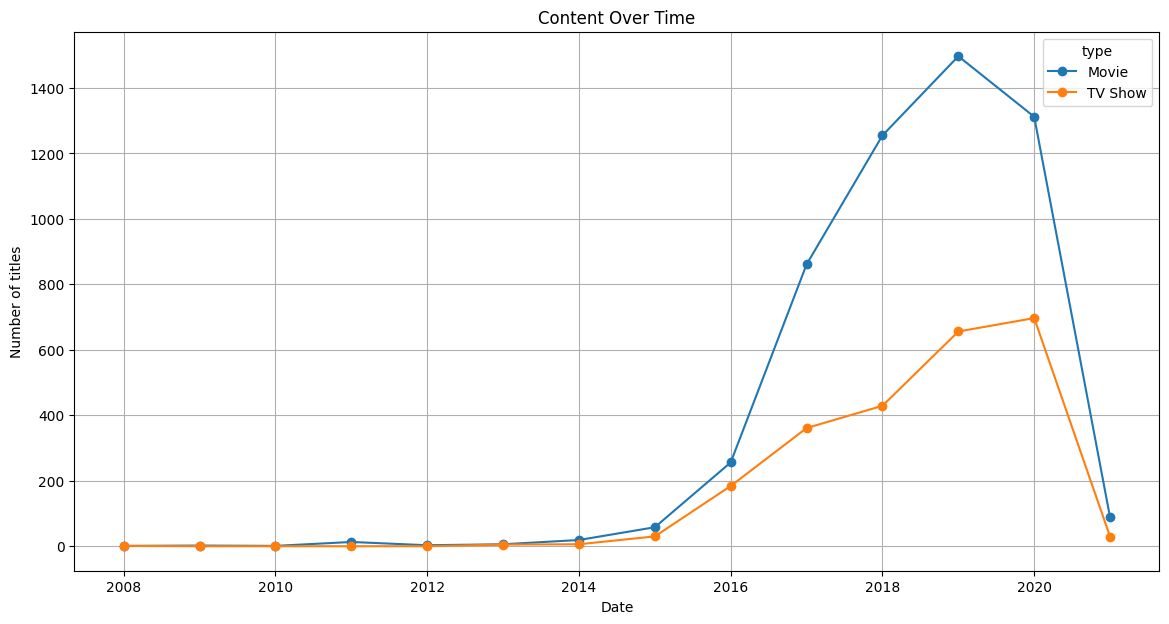

In [23]:
year_added = df['date_added'].dt.year
df['year_added'] = year_added
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(14, 7))
content_over_time.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Content Over Time')
plt.xlabel('Date')
plt.ylabel('Number of titles')
plt.grid(True)
plt.show()

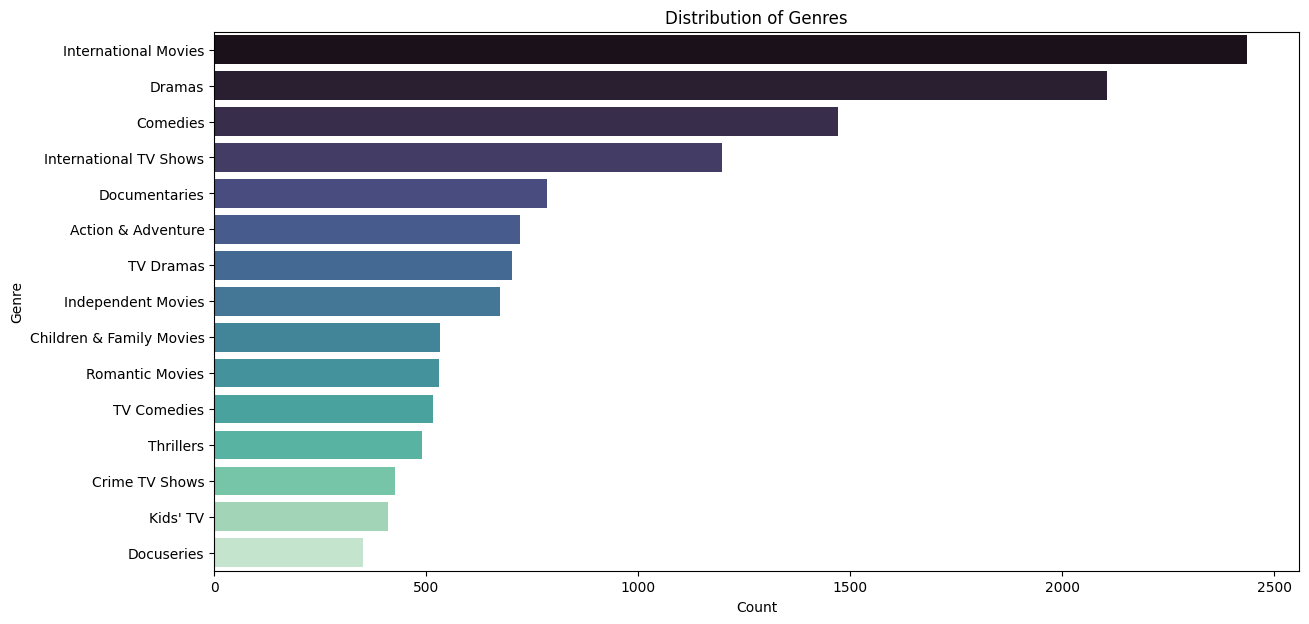

In [47]:
genere_df = df.assign(genere_df=df['listed_in'].str.split(', ')).explode('genere_df')
genere_df = genere_df['genere_df'].value_counts().reset_index()
genere_df.columns = ['genere', 'count']
genere_df=genere_df[:15]
plt.figure(figsize=(14, 7))
sns.barplot(x='count', y='genere', data=genere_df, palette='mako',)
plt.title('Distribution of Genres')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.show()

## Creating wordcloud

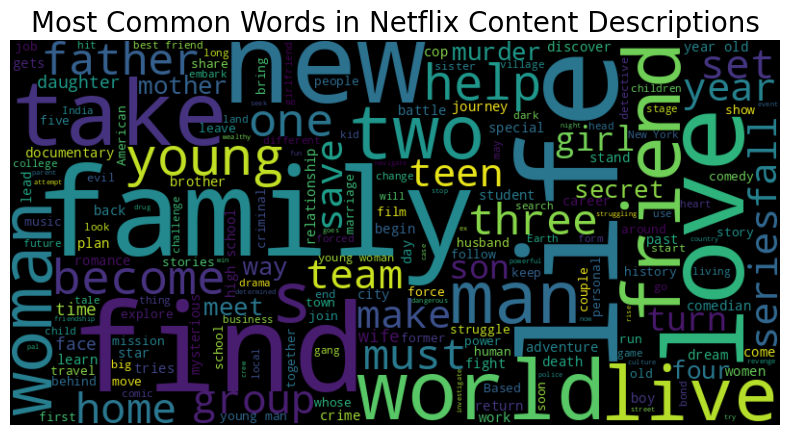

In [25]:
from wordcloud import WordCloud

text = ' '.join(df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

## Assignment
**How has the distribution of content ratings changed over time?**

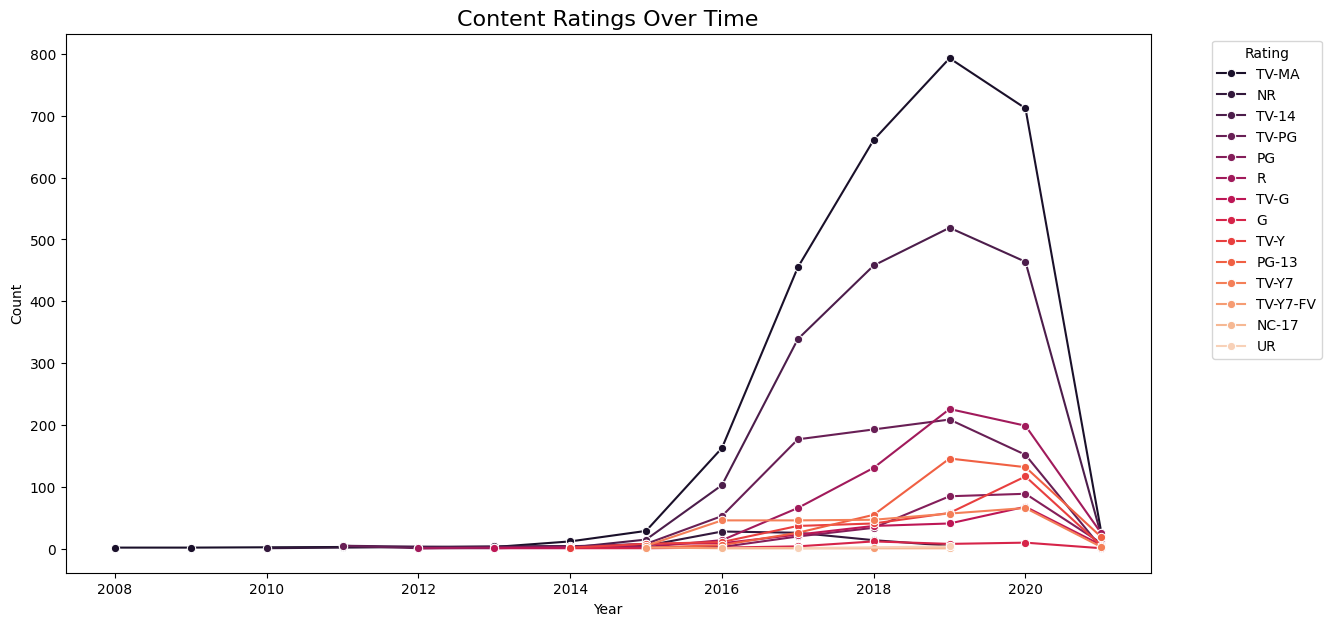

In [89]:
rating_trend = df.groupby(['year_added', 'rating']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=rating_trend, x='year_added', y='Count', hue='rating', marker="o", palette='rocket')

plt.title('Content Ratings Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Is there a relationship between content age and its type (Movie vs. TV Show)?**


*According to the below graph as the year increasing the content pattern also changing you can see mostly netflix content shifted to the tv show at the last year*

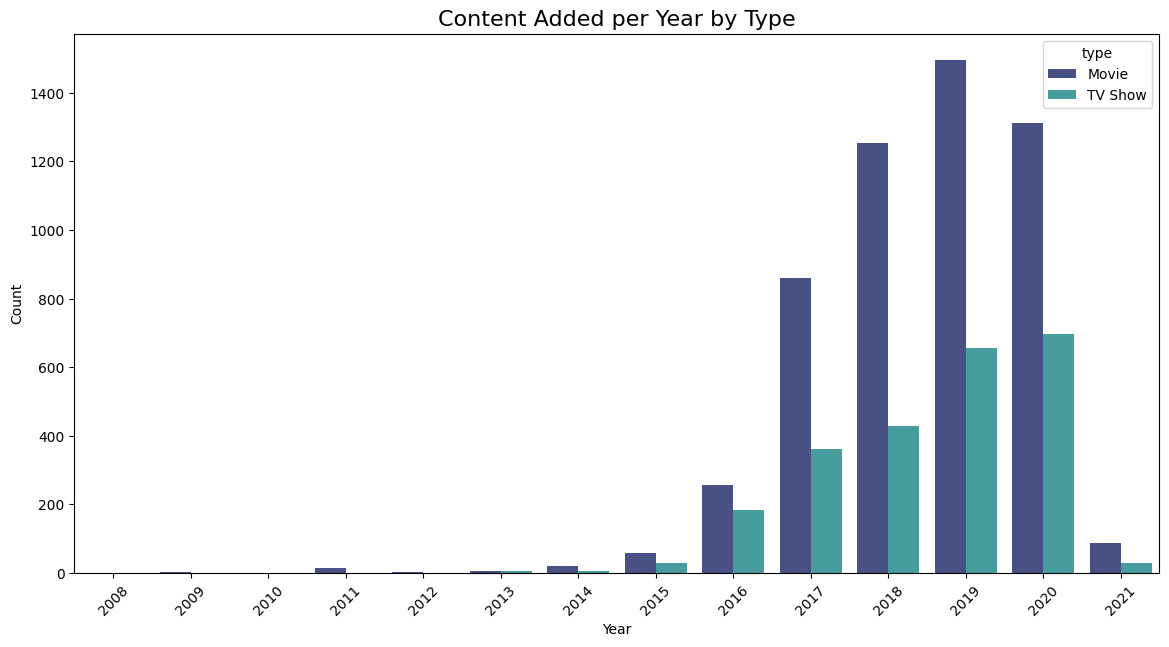

In [83]:
df['year_added'] = df['date_added'].dt.year

new_df = df.groupby(['type', 'year_added']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(data=new_df, x='year_added', y='Count', hue='type', palette='mako')

plt.title('Content Added per Year by Type', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Can we identify any trends in content production based on the release year vs. the year added to Netflix?**

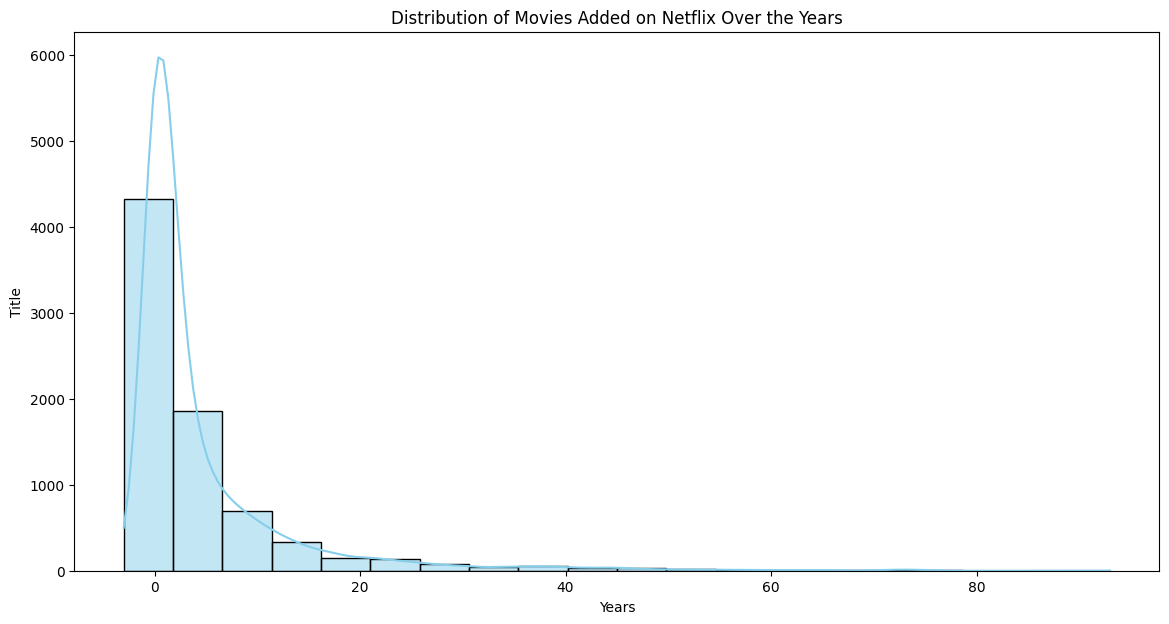

In [22]:
df['added_on_netflix']=df['date_added'].dt.year - df['release_year']
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='added_on_netflix', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movies Added on Netflix Over the Years')
plt.xlabel('Years')
plt.ylabel('Title')
plt.show()

**What are the most common word pairs or phrases in content descriptions?**


In [62]:
vectorizer = CountVectorizer(ngram_range = (2, 2), stop_words='english')
x = vectorizer.fit_transform(df['description'])
word_pairs = x.toarray().sum(axis=0)
# we can add it using dict also
word_pairs = pd.DataFrame(word_pairs, index=vectorizer.get_feature_names_out(), columns=['count'])
word_pairs = word_pairs.sort_values(by='count', ascending=False)
print('The common word in the description are:', end=' ')
[word for word in word_pairs.head(10).index]

The common word in the description are: 

['high school',
 'year old',
 'young man',
 'young woman',
 'new york',
 'small town',
 'best friend',
 'true story',
 'stand special',
 'world war']

**Who are the top directors on Netflix?**

In [72]:
director_df = df['director'].value_counts().drop('Unknown')[:10]
print('Here the top 10 director on Netflix')
[director for director in director_df.index]

Here the top 10 director on Netflix


['Raúl Campos, Jan Suter',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Martin Scorsese',
 'Youssef Chahine',
 'Jay Chapman',
 'Steven Spielberg',
 'David Dhawan',
 'Robert Rodriguez']

## Thanks for visiting